<h4>Programming Experiment No. 1</h4>
<h1>Exploratory Data Analysis</h1>

This Jupyter Notebook is written with Kaggle. For running this locally, download the dataset in Kaggle, unzip the files, and place it in the same directory as your Jupyter Notebook. Do not run the second cell, instead uncomment then run the third cell. The first two code cells is a boilerplate for Kaggle notebooks. Additional libraries are imported (i.e. seaborn and matplotlib.pyplot). Some functions that are written here are not deeply documented but verbosely named for begginers, better documentation may be committed in the GitHub repository or can be contributed with pull requests. These functions are easy for those who are familiar with Python and the libraries used here.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        dataset = os.path.join(dirname, filename)
        print(dataset)
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [3]:
# dataset = 'spotify-2023.csv'

Load the dataset.

In [4]:
spotify = pd.read_csv(dataset, encoding='latin')

First glimpse of the dataset.

In [5]:
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<h3><strong>Overview of the Dataset</strong></h3>
1. How many rows and columns does the dataset contain?

In [6]:
# Determine the shape of the dataset

spotify.shape

(953, 24)

There are 953 rows and 24 columns.

2A. What are the data types of each column?

In [7]:
# Determine the data types of each column

spotify.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

We can see that there are columns that should be quantitative (i.e. `int64`) but are `object` i.e. `streams`, `in_deezer_playlists`, and `in_shazam_playlists`. We must convert these to perform numerical computations in the specified columns.

In [8]:
def convert_to_int64(columns: list):
    ''' Converts data type to np.int64 given the list of non-numeric columns.
        Coerces type conversion and drops the inconvertible rows. '''
    for col in columns:
        spotify[col] = pd.to_numeric(spotify[col], errors='coerce')
        spotify.dropna(subset=[col], inplace=True)
        spotify[col] = spotify[col].astype('int64')
        
# Convert `streams` to int64
obj_cols = ['streams']
convert_to_int64(obj_cols)

spotify.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

We didn't convert `in_shazam_charts` and `in_deezer_charts` yet. There are two primary reasons why we didn't:


1. The reason for not coercing conversion of `in_shazam_charts` is it has missing values that is pivotal in explaining the importance of imputing missing values or completely removing entire fields in the next section. We have no interest in this field (at least I don't), so let's use this for demonstration.
2. Both of them are of `object` type because some of the values may be non-numeric and so by coercing these values, we will have NaN outputs which may be dropped when the method `dropna()` is called.

2B. Are there any missing values?

In [9]:
# Determine the data type and severity of the missing values relative to the total number of data

def count_missing(df):
    ''' Count missing values given a DataFrame. '''
    for col, count in df.isna().sum().items():
        if count > 0:
            print(f'{col} ({df[col].dtypes}): {count} are missing-> {(count/df.shape[0]*100):.2f}% of the entire column.')

count_missing(spotify)

in_shazam_charts (object): 50 are missing-> 5.25% of the entire column.
key (object): 95 are missing-> 9.98% of the entire column.


We can choose to drop the `in_shazam_charts` column since we will not be removing a large portion of the data by dropping this column. As a data scientist, the business use case doesn't really need this field/feature. Removing missing values to keep this field will just reduce the amount of clean data points we have for our dataset. You have the liberty to remove the missing values, base it on your use case. Moreover, we will be removing the `in_deezer_charts` field also from the reasons stated earlier.

In [10]:
def drop_columns(df, columns: list):
    ''' Drop columns given a DataFrame and a list of specified columns. '''
    for col in columns:
        if col in df.columns:
            df.drop(columns=col, inplace=True)
            print(f'{col} is successfully dropped.')
        else:
            print(f'{col} does not exist in the DataFrame.')

# Drop the `in_shazam_charts` column. Make sure to run this only once
drop_cols = ['in_shazam_charts', 'in_deezer_charts']
drop_columns(spotify, drop_cols)

count_missing(spotify)

in_shazam_charts is successfully dropped.
in_deezer_charts is successfully dropped.
key (object): 95 are missing-> 9.98% of the entire column.


<h3>Basic Descriptive Statistics</h3>

1. What are the mean, median, and standard deviation of the `streams` column?

In [11]:
# Quick summary statistics for the dataset

spotify.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


We can see the summary statistics for the entire dataset.

In [12]:
spotify.streams.describe()

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

If we didn't convert the `streams` column to `int64` the `describe()` method wouldn't work in this `pandas.Series` object. With type conversion, we arrived with the given summary statistics. The mean, median (50th quantile), and standard deviation of the `streams` field is 5.14e+08, 2.91e+08, and 5.67e+08, respectively.

2. What is the distribution of `released_year` and `artist_count`? Are there any noticeable trends or outliers?

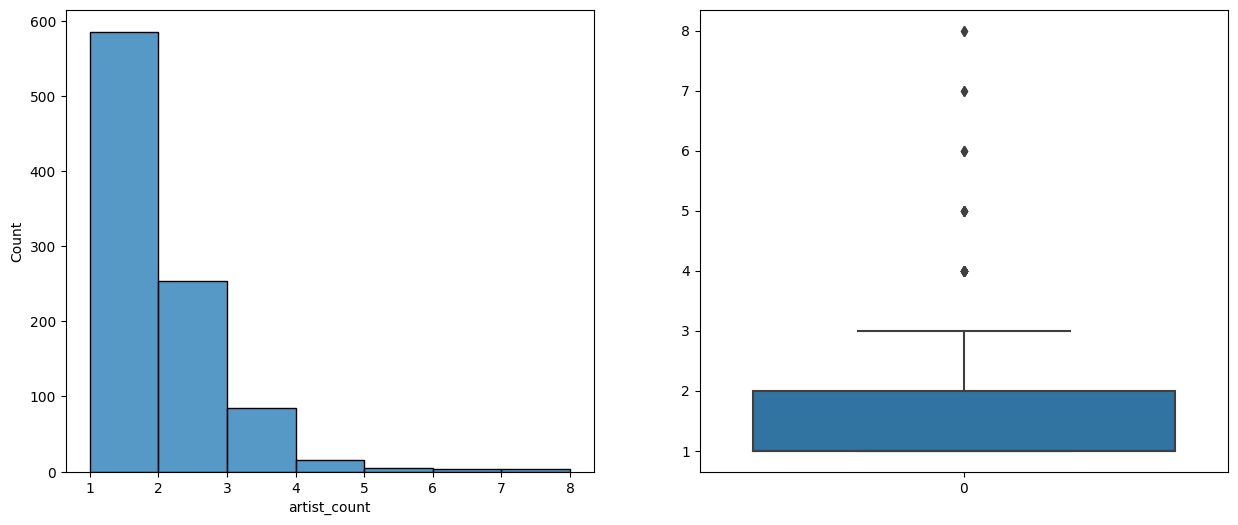

In [13]:
def hist_and_box(col, binwidth, df=spotify):
    ''' Creates a figure with a histogram and a boxplot for a specified column in a DataFrame. '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    sns.histplot(df[col], binwidth=binwidth, ax=axes[0]);
    sns.boxplot(df[col]);

# Histogram
hist_and_box('artist_count', binwidth=1)

In [14]:
# Number of `artist_count` outliers

spotify[spotify.artist_count > 3].shape[0] # there are 27 outliers

27

We can see an obvious trend in the number of artists per track which seems to be an exponential decay. There are also 27 outliers which are tracks that have more than four (4) artists working on the same song according to the boxplot.

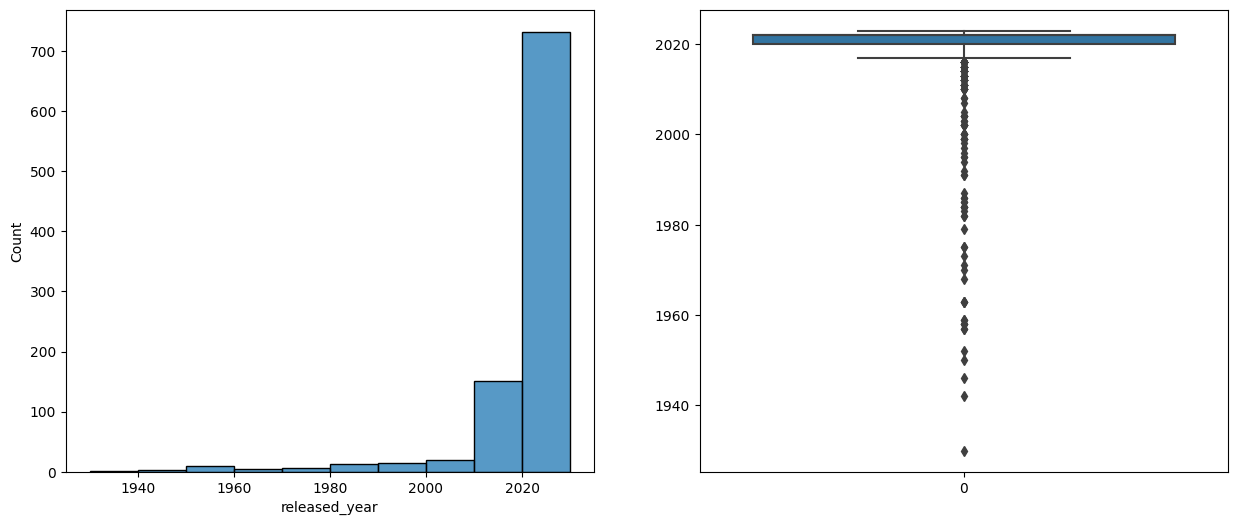

In [15]:
hist_and_box('released_year', binwidth=10)

In [16]:
# Calculate the interquartile range 
iqr = (spotify.released_year.quantile(0.75) - spotify.released_year.quantile(0.25))

# Determine the minimum threshold for outlier (typically 1.5 the IQR)
min_threshold = spotify.released_year.quantile(0.25) - iqr * 1.5

# Determine the number of outliers
spotify[spotify.released_year < min_threshold].shape[0] # there are 150 outliers

150

We can see that most songs are actually within 2015 and 2020. There are also 150 outliers given a boxplot whisker IQR multiple of 1.5. We can look deeper and find more granularity in our data by bucketizing the values from 2015 up to the latest data.

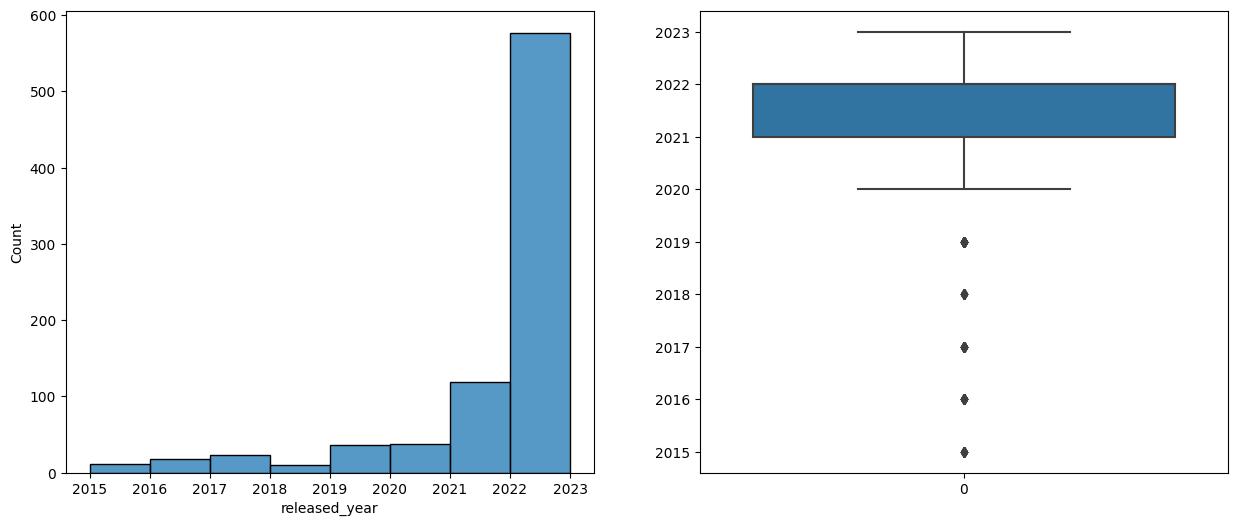

In [17]:
spotify_2015_to_present = spotify[spotify.released_year > 2014]

hist_and_box('released_year', binwidth=1, df=spotify_2015_to_present)

By looking deeper we can see that most of the songs are from 2021 to 2023. We can look deeper and deeper, but let's save it for later this time around. Most of the distribution are found in the latter years.

<h3>Top Performers</h3>
1. Which track has the highest number of `streams`? Display the top 5 most streamed tracks.

In [18]:
# Descending trend by streams

spotify_stream_desc = spotify.sort_values(by='streams', ascending=False)
spotify_stream_desc.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


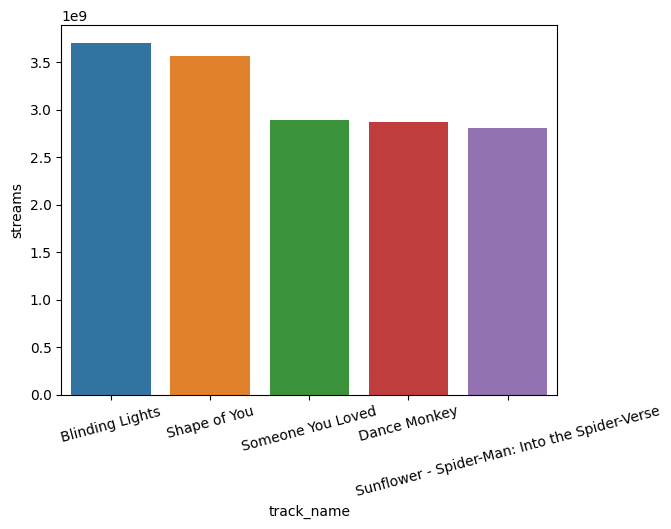

In [19]:
sns.barplot(x='track_name', y='streams', data=spotify_stream_desc.head())
plt.tick_params(axis='x', rotation=15);

In [20]:
print('The most streamed tracks are:')

for ix, (_, row) in enumerate(spotify_stream_desc.head().iterrows()):
    print(f'{ix+1}. {row.track_name} by {row["artist(s)_name"]} with {row.streams} streams.')

The most streamed tracks are:
1. Blinding Lights by The Weeknd with 3703895074 streams.
2. Shape of You by Ed Sheeran with 3562543890 streams.
3. Someone You Loved by Lewis Capaldi with 2887241814 streams.
4. Dance Monkey by Tones and I with 2864791672 streams.
5. Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee with 2808096550 streams.


2. Who are the top 5 most frequent artists based on the number of tracks in the dataset?

We know that there can be multiple artists in a single track. Frequency can be shown by exploding the `artist(s)_name` field into separate instances which is done in the code cell below. Here, we can see the instances where an artist collaborated.

In [21]:
# Create new row or instance for multiple artists

# split by comma delimitation
spotify['artist(s)_name'] = spotify['artist(s)_name'].str.split(', ')

# explode by the `artist(s)_name` column
spotify_exploded = spotify.explode('artist(s)_name')

# change artist_count to 1
spotify_exploded.artist_count = 1

spotify_exploded.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,1,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,1,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15


In [22]:
# Most frequent artist

spotify_artist_frequent = spotify_exploded.groupby('artist(s)_name').sum('artist_count').sort_values(by='artist_count', ascending=False)
spotify_artist_frequent.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist(s)_name,,,,,,,,,,,,,,,,,
Bad Bunny,40,80866,215,528,137562,675,23813527270,2016,2315,4958,2977,2028,2765,949,63,782,451
Taylor Swift,38,76781,278,594,137766,544,14630378183,1899,1945,4712,2279,1298,2096,1196,23,633,267
The Weeknd,37,74760,166,506,233079,555,23929760757,3023,2608,4353,2228,1615,2358,747,36,763,299
Kendrick Lamar,23,46491,112,319,113963,38,5555903581,703,296,2820,1528,1104,1341,945,1,375,542
SZA,23,46502,266,231,64502,114,6493011189,1098,1271,2690,1380,1099,1238,1108,42,447,221


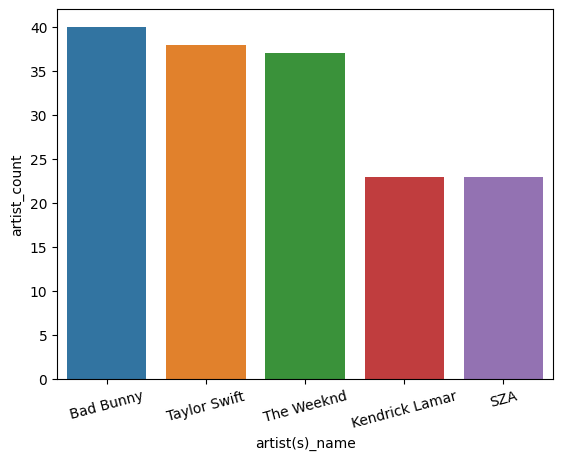

In [23]:
sns.barplot(x='artist(s)_name', y='artist_count', data=spotify_artist_frequent.reset_index().head())
plt.tick_params(axis='x', rotation=15);

By getting the sum of each artist appearing, grouping it by the name of that artist, and sorting it in descending order, we get the most frequent artists.

In [24]:
print('The top artists are:')
for ix, (_, row) in enumerate(spotify_artist_frequent.head().iterrows()):
    print(f'{ix+1}. {_} with a total of {row.artist_count} tracks.')

The top artists are:
1. Bad Bunny with a total of 40 tracks.
2. Taylor Swift with a total of 38 tracks.
3. The Weeknd with a total of 37 tracks.
4. Kendrick Lamar with a total of 23 tracks.
5. SZA with a total of 23 tracks.


In [25]:
# Additional: Most number of streams

spotify_artist_top = spotify_exploded.groupby('artist(s)_name').sum('streams').sort_values(by='streams', ascending=False)
spotify_artist_top.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist(s)_name,,,,,,,,,,,,,,,,,
The Weeknd,37,74760,166,506,233079,555,23929760757,3023,2608,4353,2228,1615,2358,747,36,763,299
Bad Bunny,40,80866,215,528,137562,675,23813527270,2016,2315,4958,2977,2028,2765,949,63,782,451
Ed Sheeran,14,28249,83,169,142877,98,15316587718,1857,644,1590,1000,779,884,456,0,245,72
Taylor Swift,38,76781,278,594,137766,544,14630378183,1899,1945,4712,2279,1298,2096,1196,23,633,267
Harry Styles,17,34362,110,320,110026,185,11608645649,1741,545,2185,1043,918,1001,728,27,243,91


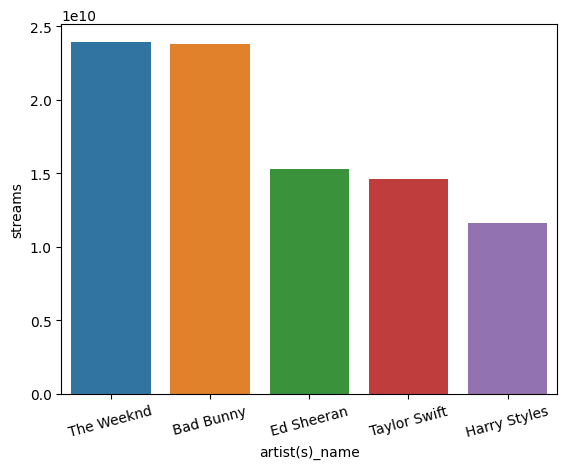

In [26]:
sns.barplot(x='artist(s)_name', y='streams', data=spotify_artist_top.reset_index().head())
plt.tick_params(axis='x', rotation=15);

Additionally, we can identify the top artists by getting the sum of streams grouped by the artist names, and sorting it in descending order.

In [27]:
print('The top artists are:')
for ix, (_, row) in enumerate(spotify_artist_top.head().iterrows()):
    print(f'{ix+1}. {_} with a total of {row.streams} streams.')

The top artists are:
1. The Weeknd with a total of 23929760757 streams.
2. Bad Bunny with a total of 23813527270 streams.
3. Ed Sheeran with a total of 15316587718 streams.
4. Taylor Swift with a total of 14630378183 streams.
5. Harry Styles with a total of 11608645649 streams.


<h3>Temporal Trends</h3>
1. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

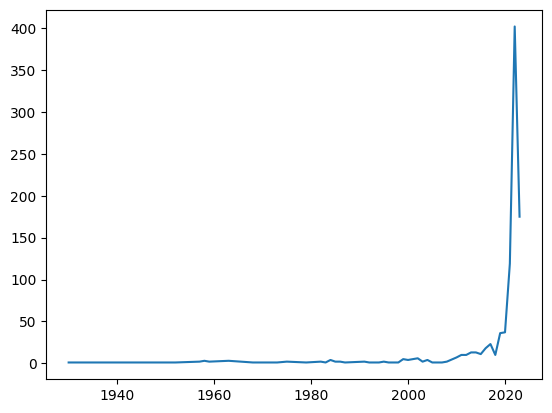

In [28]:
# Obtain the number of released songs per year

spotify_year = spotify.groupby('released_year').size()

# Create a line plot
plt.plot(spotify_year);

We don't really see any seasonality with this coarse perspective. However, we can see that the number of songs shoot up drastically. It may be because the data gathered are only those who have high number of streams and it is typical that the number of streams are dependent on the year it is released. Moreover, we can see a sudden drop, this requires further investigation. Based on domain knowledge, it seems that the data is published when the year hasn't even finished yet where more songs can probably be released.

2. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

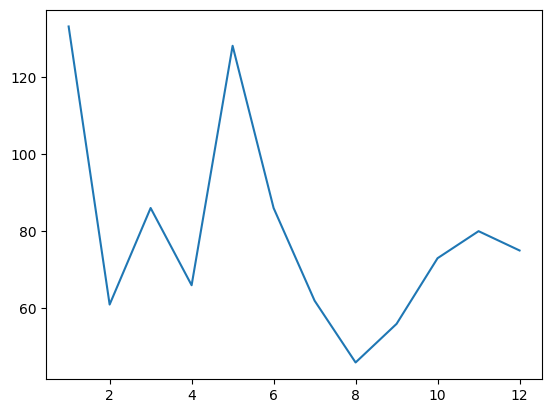

In [29]:
spotify_month = spotify.groupby('released_month').size()

plt.plot(spotify_month);

The total number of songs released per month is pretty erratic without any noticeable pattern. There are a lot of songs bring published during January and May and the lowest during August. Let's look deeper and see the trends per year given the significant years we explored earlier i.e. 2020 - 2023.

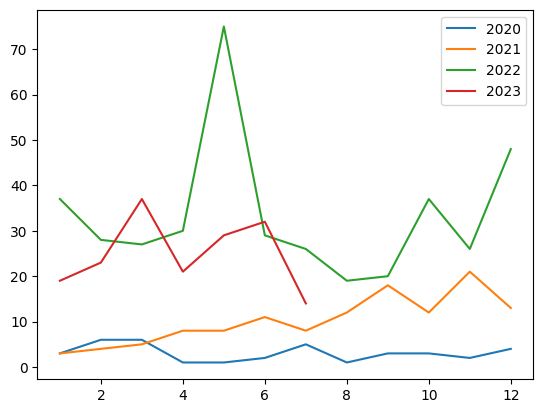

In [30]:
# Create a for loop that iterates from 2020 to 2023

for year in range(2020, 2024):
    # obtain the sum of all tracks in a certain month
    spotify_sub = spotify[spotify.released_year == year].groupby('released_month').size()
    
    # plot it with the year as a label
    plt.plot(spotify_sub, label=year)

# show the plot
plt.legend()
plt.show();

There doesn't seem to be trend here. We may need more data to find any seasonality or this is just purely random in nature.

<h3>Genre and Music Characteristics</h3>


1. Examine the correlation between `streams` and musical attributes like `bpm`, `danceability_%`, and `energy_%`. Which attributes seem to influence streams the most?

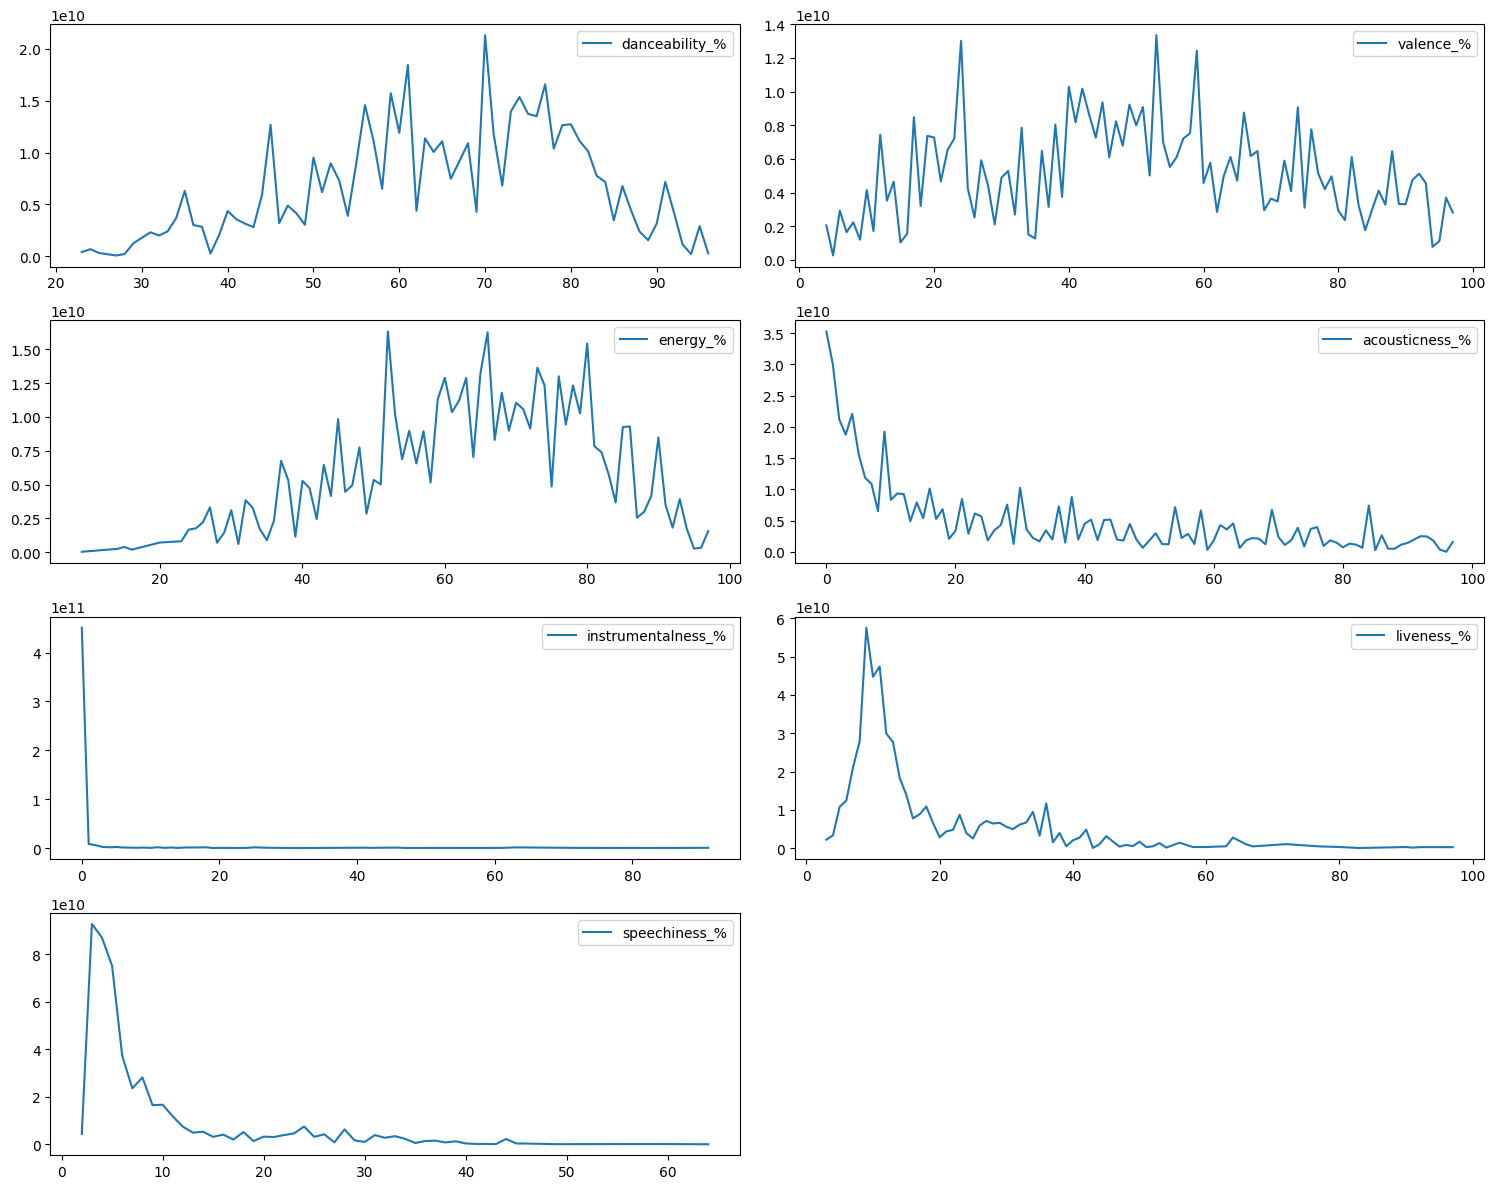

In [31]:
# Subset the data to only the streams and musical attributes

# target attributes
attrs = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# create multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

# flatten the subplots for easier indexing
axes = axes.flatten()

# loop through all the musical attributes
for ix, attr in enumerate(attrs):
    
    # get the sum of streams per category
    spotify_sub = spotify[['streams', attr]].groupby(attr).sum().sort_values(attr)
    
    # create a line plot
    axes[ix].plot(spotify_sub.index, spotify_sub['streams'], label=attr)
    
    # set the legend
    axes[ix].legend()

# remove extra subplots
for ax in axes[len(attrs):]:
    fig.delaxes(ax)
    
plt.tight_layout()
plt.show();

Given the set of plots, we can describe the relationship between streams and each musical attribute. In terms of danceability, the extremes show little patronage while having around 60% to 80% shows a significant amount of streams. In terms of valence, the plot is pretty erratic but the density is mostly in the center which is around 50%. Listeners like more energy in their music as the stream density is high at around 60% to 80%. A decrease in number of streams can be observed when the acousticness increases. A very low instrumentalness leads to more streams pooling around 0%. Liveness at 10% shows the most amount of streams then falls off beyond 0% and 20%. Lastly, optimal speechiness is around 5% in terms of number of streams.

2. Is there a correlation between `danceability_%` and `energy_%`? How about `valence_%` and `acousticness_%`?

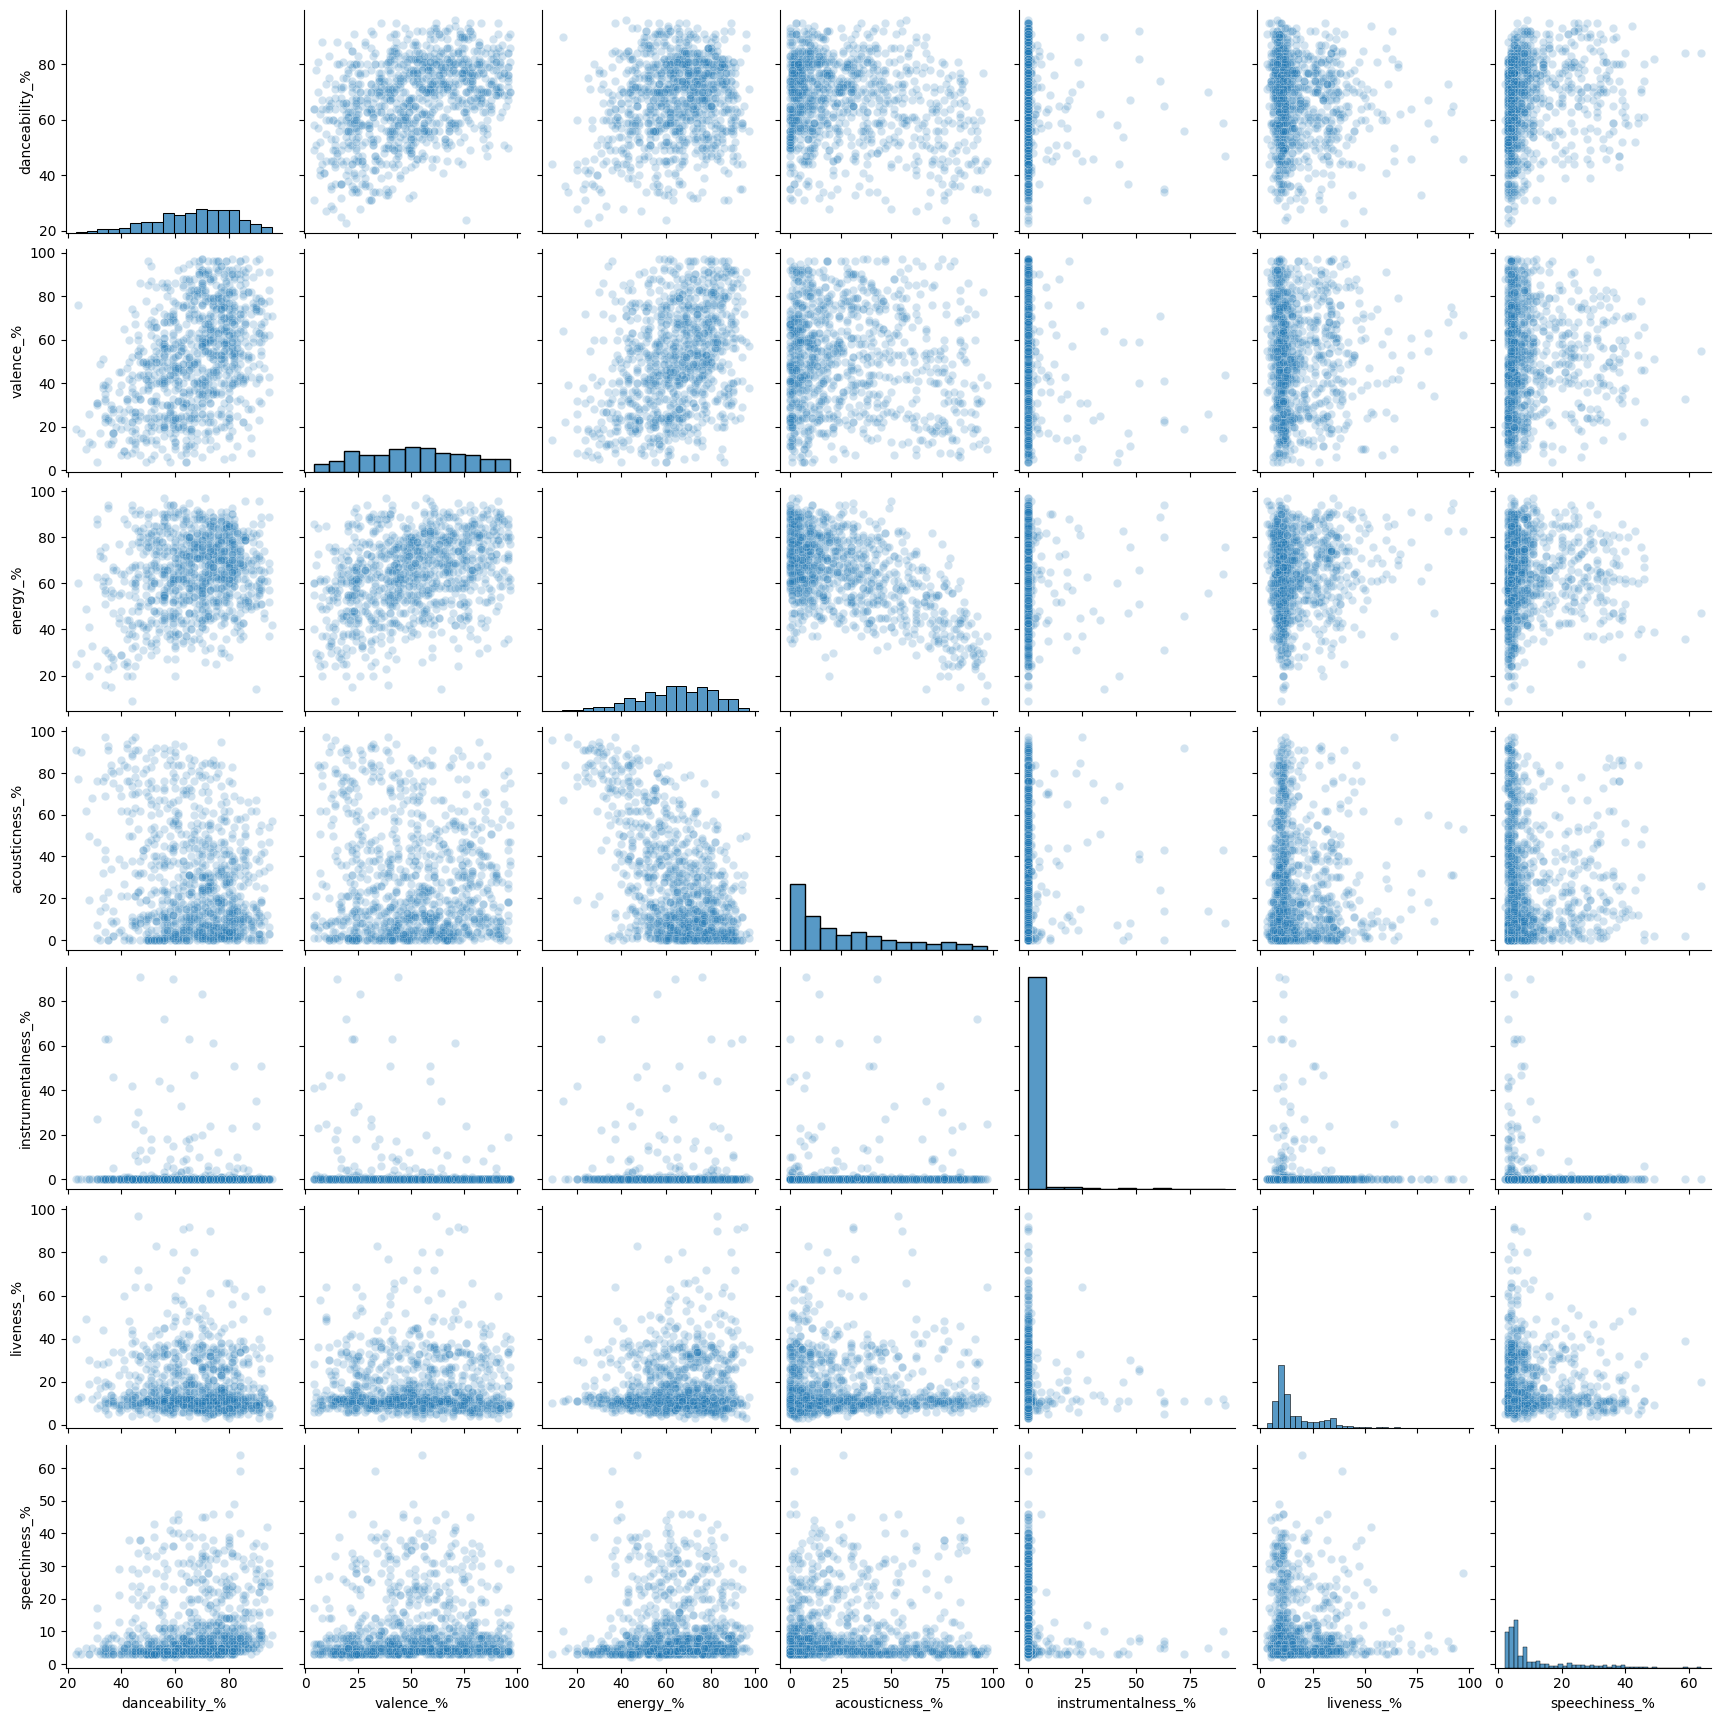

In [32]:
# create a pairplot using the musical attributes
spotify_attr = spotify[attrs]

# set the transparency to see the relationships better
sns.pairplot(spotify_attr, plot_kws={'alpha': 0.2});

Given the pairplot (multiple scatterplots) above, there seems to be a relationship between danceability and energy such that a high energy correlates to a high danceability. Valence and danceability shows a stronger positive correlation. There is also a much stronger positive correlation between valence and energy. A negative correlation between energy and acousticness can be observed. Since most of the data are skewed, it's hard to tell the correlation among other musical attributes. However, several statistical instruments can be used for this which is beyond the scope of this laboratory.

<h3>Platform Popularity</h3>
1. How do the numbers of tracks in `spotify_playlists`, `spotify_charts`, and `apple_playlists` compare? Which platform seems to favor the most popular tracks?

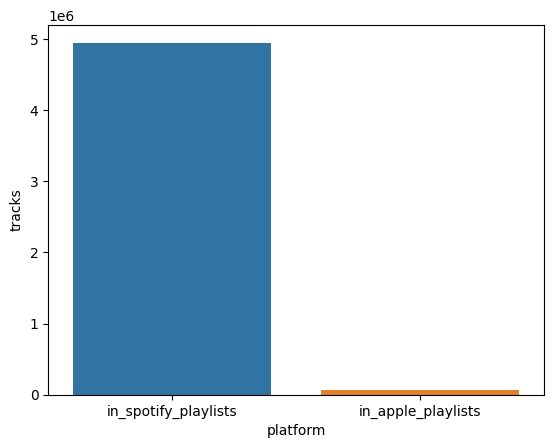

In [33]:
# target platforms
playlists = ['in_spotify_playlists',  'in_apple_playlists',]

# getting the sum of tracks per playlist platform
platform_tracks = [spotify[playlist].sum() for playlist in playlists]

# creating a DataFrame
spotify_playlists = pd.DataFrame({'platform': playlists,
                                 'tracks': platform_tracks})

sns.barplot(x='platform', y='tracks', data=spotify_playlists);

The number of tracks in Spotify playlists is significantly higher than in Apple playlists.

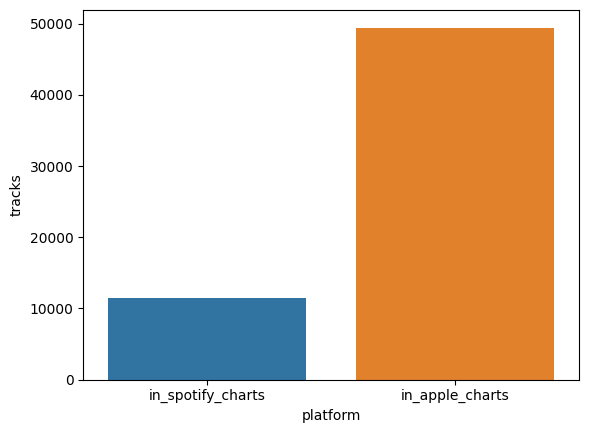

In [34]:
# target platforms
charts = ['in_spotify_charts', 'in_apple_charts']

# getting the sum of tracks per playlist platform
platform_tracks = [spotify[chart].sum() for chart in charts]

# creating a DataFrame
spotify_charts = pd.DataFrame({'platform': charts,
                                 'tracks': platform_tracks})

sns.barplot(x='platform', y='tracks', data=spotify_charts);

The number of tracks in Apple charts are much higher than the tracks in Spotify charts.

The track popularity is dependent on the amount of streams. We must pick the five (5) most popular tracks first then plot the amount of playlists and charts for both platforms (i.e. Spotify and Apple). The top tracks are stored in `spotify_artist_top.head()`. 

<h3>Glimpse Back to Missing Values</h3>

A key thing to remember in dropping values is you don't have to drop them unless you're using them. Consistency of the data can be the cost of finding richer insights, it still is dependent on your use case.

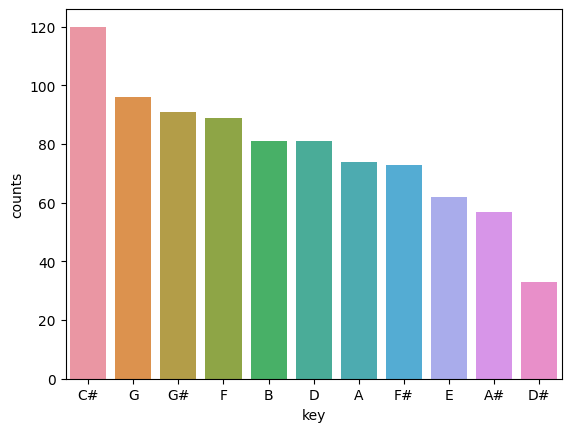

In [35]:
# Determine unique key values and distribution

%matplotlib inline

def barplot_values(df, col):
    ''' Creates a bar plot of the frequency of unique categorical values
        given DataFrame and a specified column. '''
    count = df[col].value_counts()
    count = count.reset_index()
    count.columns = [col, 'counts']
    sns.barplot(x=col, y='counts', data=count);
    
    
barplot_values(spotify, 'key')

In practical sense, the `key` column is important. Filling this with mode will skew the data in favor of the highest number. To attain highest data integrity, we must opt to remove instances with missing `key` value. For demonstration purposes, we are keeping it and imputing it with the mode of the `key` column.

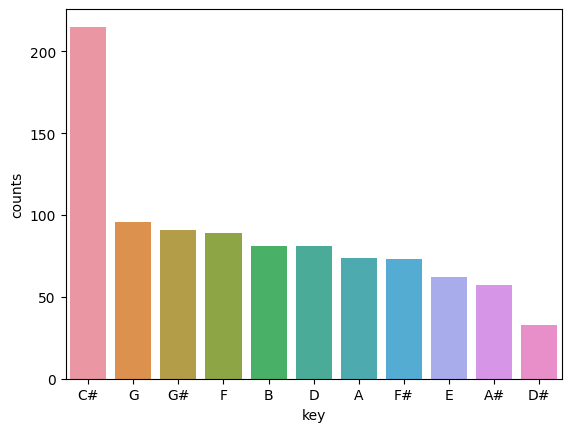

In [36]:
# use a new DataFrame for demonstration
spotify_a = spotify.copy()

# Impute the missing key values with its mode
spotify_a.fillna(spotify.key.mode()[0], inplace=True)

count_missing(spotify_a)
barplot_values(spotify_a, 'key')

We can see that `key=C#` has a high frequency. This will skew our results, we can still choose to remove the missing values. In this laboratory, we will be removing the missing values but not drop the entire column.

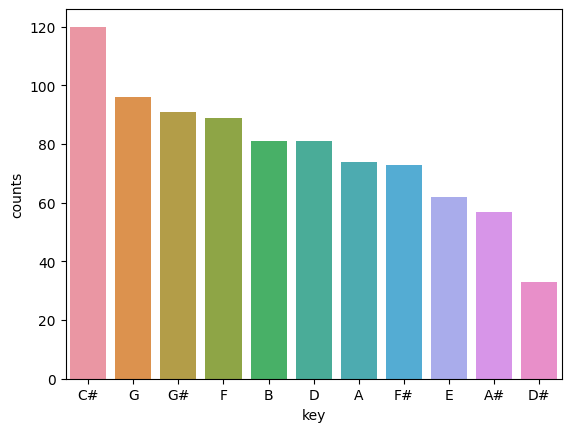

In [37]:
# Let's go back and simply remove the missing values
spotify.dropna(inplace=True)

barplot_values(spotify, 'key')

<h3>Advanced Analysis</h3>
1. Based on the `streams` data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?


In [38]:
# Obtaining the sum of streams per key

spotify_key = spotify[['key', 'streams']].groupby('key').sum('streams').sort_values(by='streams', ascending=False)

# reset index and assign columns to `key` and `streams`
spotify_key.reset_index(inplace=True)
spotify_key.columns = ['key', 'streams']

spotify_key

,key,streams
0,C#,72513629843
1,G,43449542493
2,G#,43398979639
3,D,42891570295
4,B,42067184540
5,F,41691728620
6,F#,38132510024
7,E,35804825731
8,A#,31491099814
9,A,30254264458


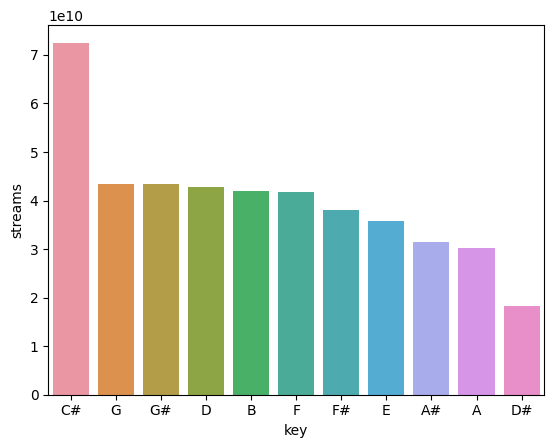

In [39]:
sns.barplot(x='key', y='streams', data=spotify_key);

We can see here the number of streams given a key. It's almost as if `key=C#` dominates all keys but we have to normalize this with the number of tracks that have `key=C#` to see the average number of streams per key.

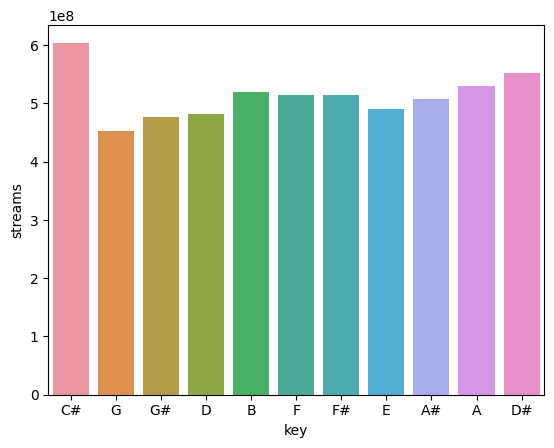

In [40]:
# convert streams to average stream per key
spotify_key.streams = spotify_key.streams / spotify.key.value_counts().values

# create a barplot
sns.barplot(x='key', y='streams', data=spotify_key);

By obtaining the average number of streams per key, we can see that the number of streams is pretty much the same for all number of keys. However, we can still see a slight increase in number of streams for C# tracks.

In [41]:
# Obtaining the sum of streams per mode

spotify_mode = spotify[['mode', 'streams']].groupby('mode').sum('streams').sort_values(by='streams', ascending=False)

# reset index and assign columns to `mode` and `streams`
spotify_mode.reset_index(inplace=True)
spotify_mode.columns = ['mode', 'streams']

spotify_mode

,mode,streams
0,Major,256127032755
1,Minor,183818508527


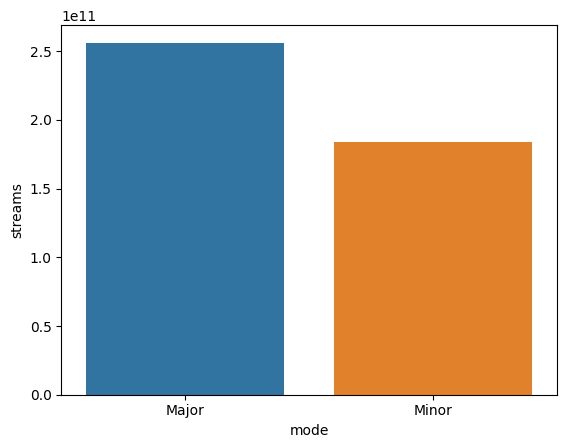

In [42]:
sns.barplot(x='mode', y='streams', data=spotify_mode);

We can see here that there is a significant amount of streams that Major tracks have over Minor tracks. Let's get the average again to see if there will be any changes.have

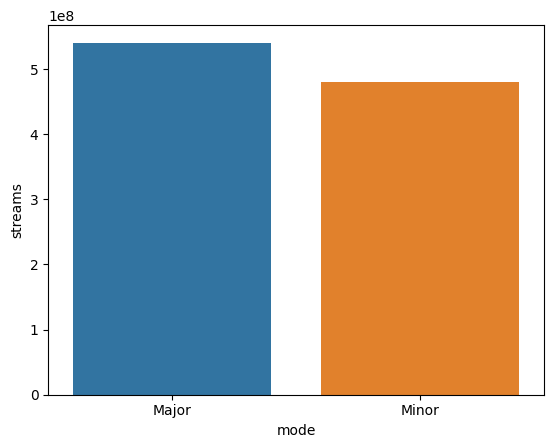

In [43]:
# convert streams to average stream per key
spotify_mode.streams = spotify_mode.streams / spotify[['mode']].value_counts().values

# create a barplot
sns.barplot(x='mode', y='streams', data=spotify_mode);

Just like in the previous inference, the number of stream difference between Major and Minor is decreased when the average number of streams per mode is calculated.

2. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.


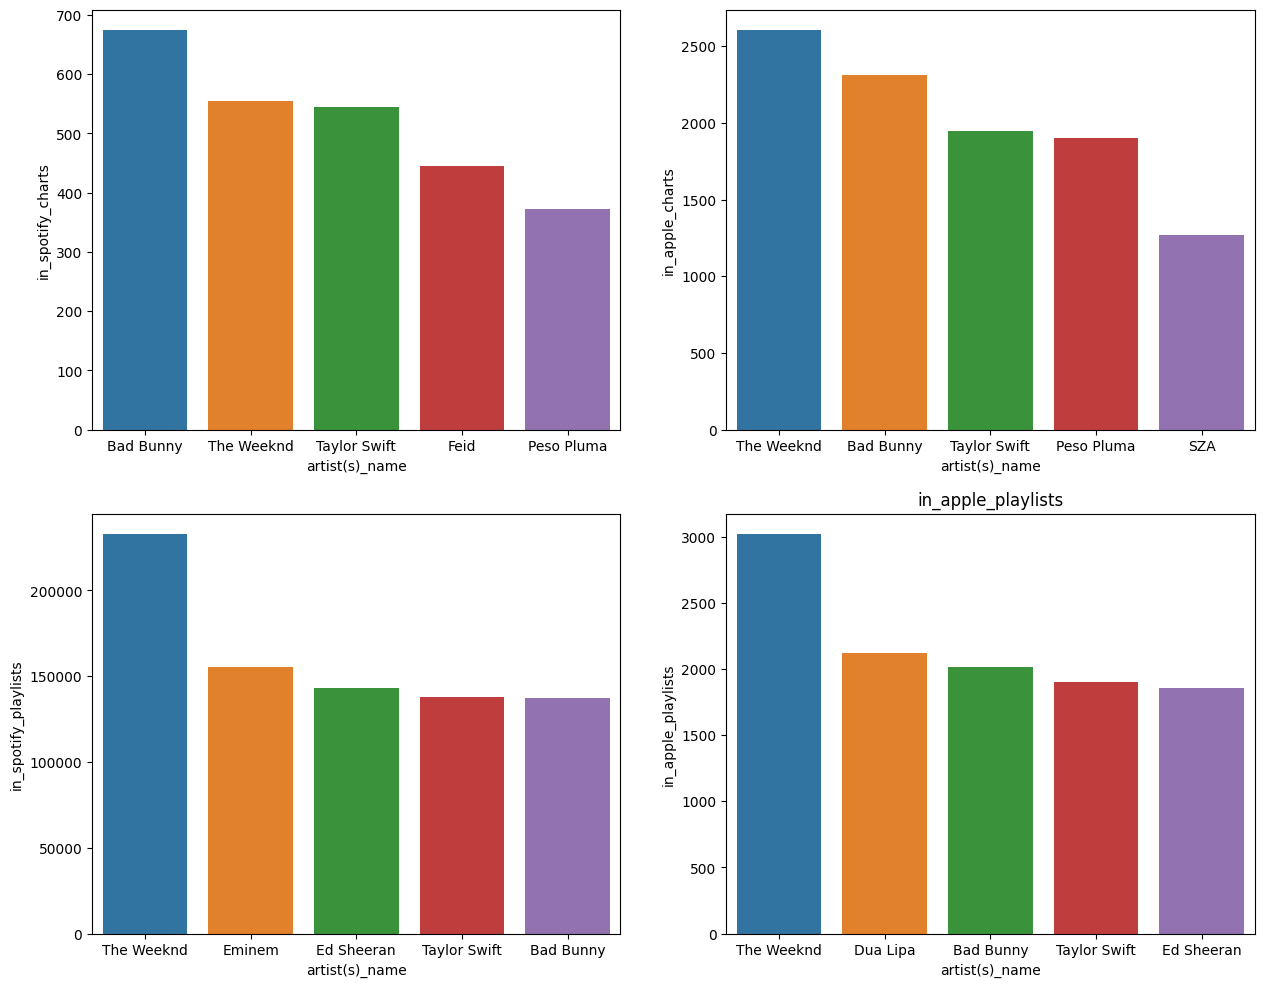

In [44]:
# We will be using the spotify_exploded DataFrame to segment each artist as a lone instance
platforms = ['in_spotify_charts', 'in_apple_charts', 'in_spotify_playlists', 'in_apple_playlists']

# create multiple subplots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 12))

# flatten axes for easier indexing
axes = axes.flatten()

# iterate through the platforms
for ix, platform in enumerate(platforms):
    
    # get the sum by artist name
    spotify_sub = spotify_exploded.groupby('artist(s)_name').sum(platform).sort_values(platform, ascending=False).reset_index()
    
    plt.title(platform)
    # plot with a bar plot per platform
    sns.barplot(x='artist(s)_name', y=platform, data=spotify_sub.head(), ax=axes[ix])
    
    